# MNIST Keras example

In this notebook we simply show how to train a neural network using Keras on MNIST dataset.

In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K


Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

11493376/11490434 [==============================] - 22s 2us/step


## Prepare dataset

In [3]:
# Set the time of each attribute as a float32 number
x_train = x_train.astype('float32')

# Scale the pixel value to the interval [0, 1]
x_train /= 255

# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, 10)

## Create a neural network model and train it with SGD

In [4]:
model1 = Sequential()
model1.add(Flatten())
model1.add(Dense(10, activation='relu'))
model1.add(Dense(50, activation='relu'))
model1.add(Dense(10, activation='softmax'))

model1.compile(loss=keras.losses.mean_squared_error, optimizer=keras.optimizers.SGD())

In [5]:
model1.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 3s 51us/step - loss: 0.0905
Epoch 2/10
60000/60000 [==============================] - 1s 15us/step - loss: 0.0902
Epoch 3/10
60000/60000 [==============================] - 1s 15us/step - loss: 0.0899: 
Epoch 4/10
60000/60000 [==============================] - 1s 15us/step - loss: 0.0896
Epoch 5/10
60000/60000 [==============================] - 1s 15us/step - loss: 0.0893
Epoch 6/10
60000/60000 [==============================] - 1s 15us/step - loss: 0.0891
Epoch 7/10
60000/60000 [==============================] - 1s 14us/step - loss: 0.0888
Epoch 8/10
60000/60000 [==============================] - 1s 15us/step - loss: 0.0885
Epoch 9/10
60000/60000 [==============================] - 1s 15us/step - loss: 0.0882
Epoch 10/10
60000/60000 [==============================] - 1s 15us/step - loss: 0.0878


## Create a neural network model and train it with AdaDelta

In [ ]:
model2 = Sequential()
model2.add(Flatten())
model2.add(Dense(10, activation='relu'))
model2.add(Dense(50, activation='relu'))
model2.add(Dense(10, activation='softmax'))

model2.compile(loss=keras.losses.mean_squared_error, optimizer=keras.optimizers.Adadelta())

In [ ]:
model2.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 2s 30us/step - loss: 0.0547
Epoch 2/10
60000/60000 [==============================] - 1s 24us/step - loss: 0.0196
Epoch 3/10
60000/60000 [==============================] - 2s 27us/step - loss: 0.0151
Epoch 4/10
60000/60000 [==============================] - 2s 27us/step - loss: 0.0136
Epoch 5/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.0128
Epoch 6/10
60000/60000 [==============================] - 2s 25us/step - loss: 0.0121
Epoch 7/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.0116
Epoch 8/10
60000/60000 [==============================] - 2s 27us/step - loss: 0.0111
Epoch 9/10
60000/60000 [==============================] - 2s 27us/step - loss: 0.0108
Epoch 10/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.0105


## Create a CONVNET

In [6]:
model3 = Sequential()
model3.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))
model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(10, activation='softmax'))

model3.compile(loss=keras.losses.mean_squared_error, optimizer=keras.optimizers.Adadelta())

In [ ]:
model3.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 10s 174us/step - loss: 0.0295
Epoch 2/10
60000/60000 [==============================] - 5s 92us/step - loss: 0.0131
Epoch 3/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.0093
Epoch 4/10
60000/60000 [==============================] - 5s 91us/step - loss: 0.0073
Epoch 5/10
60000/60000 [==============================] - 5s 91us/step - loss: 0.0061
Epoch 6/10
60000/60000 [==============================] - 5s 91us/step - loss: 0.0054
Epoch 7/10
60000/60000 [==============================] - 5s 90us/step - loss: 0.0048
Epoch 8/10
60000/60000 [==============================] - 5s 91us/step - loss: 0.0044
Epoch 9/10
60000/60000 [==============================] - 5s 90us/step - loss: 0.0040
Epoch 10/10
60000/60000 [==============================] - 5s 91us/step - loss: 0.0038


## Are our models working good? Let's see

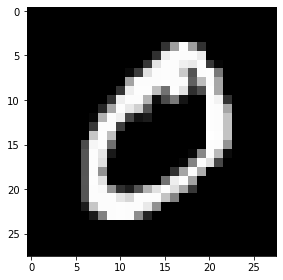

In [ ]:
from skimage import color
from skimage import io
from skimage import transform
import numpy as np

io.imshow(x_train[1, :, :, 0])

In [ ]:
model1.predict_classes(x_train)[1]

0

In [ ]:
model2.predict_classes(x_train)[1]

0

In [ ]:
model3.predict_classes(x_train)[1]

0

## Let's try how good is our model using our own numbers           :o

This is just a simple function used to allow you to make a drawing in Jupyter...

In [ ]:
from IPython.display import HTML, Image
from google.colab.output import eval_js
from base64 import b64decode

canvas_html = """
<canvas style="border: 2px solid black;" width=%d height=%d></canvas>
<button>Finish</button>
<script>
var canvas = document.querySelector('canvas')
var ctx = canvas.getContext('2d')
ctx.lineWidth = %d
var button = document.querySelector('button')
var mouse = {x: 0, y: 0}
canvas.addEventListener('mousemove', function(e) {
  mouse.x = e.pageX - this.offsetLeft
  mouse.y = e.pageY - this.offsetTop
})
canvas.onmousedown = ()=>{
  ctx.beginPath()
  ctx.moveTo(mouse.x, mouse.y)
  canvas.addEventListener('mousemove', onPaint)
}
canvas.onmouseup = ()=>{
  canvas.removeEventListener('mousemove', onPaint)
}
var onPaint = ()=>{
  ctx.lineTo(mouse.x, mouse.y)
  ctx.stroke()
}
var data = new Promise(resolve=>{
  button.onclick = ()=>{
    resolve(canvas.toDataURL('image/png'))
  }
})
</script>
"""

def draw(filename='drawing.png', w=280, h=280, line_width=1):
  display(HTML(canvas_html % (w, h, line_width)))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)

Here you can draw a number:

In [ ]:
draw()

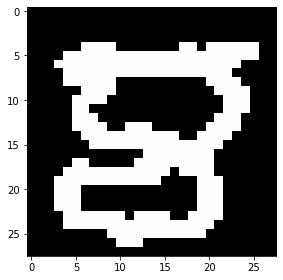

In [ ]:
img = io.imread('drawing.png')
img_scaled = transform.resize(img[:,:,3], (28, 28), anti_aliasing=True)
img_scaled = img_scaled.reshape((28, 28))

for cell in np.nditer(img_scaled, op_flags=['readwrite']):
    if cell  != 0 :
        cell[...] = 0.99

io.imshow(img_scaled)

In [ ]:
print("The predicted number by SGD trained model is: " + str(model1.predict_classes(img_scaled.reshape((1, 28, 28, 1)))[0]))

The predicted number by SGD trained model is: 2


In [ ]:
print("The predicted number by Adadelta trained model is: " + str(model2.predict_classes(img_scaled.reshape((1, 28, 28, 1)))[0]))

The predicted number by Adadelta trained model is: 2


In [ ]:
print("The predicted number by Adadelta trained CNN model is: " + str(model3.predict_classes(img_scaled.reshape((1, 28, 28, 1)))[0]))

The predicted number by Adadelta trained CNN model is: 5


## Preprocessing our numbers consistently

All images are size normalized to fit in a 20x20 pixel box and are centered in a 28x28 image using the center of mass

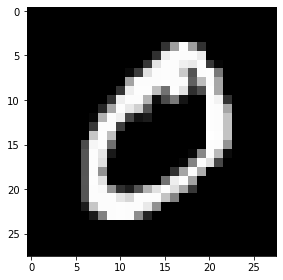

In [ ]:
io.imshow(x_train[1,:,:,0])

1. Delete empty rows and columns to each side of the number

In [ ]:
while np.sum(img_scaled[0]) == 0:
    img_scaled = img_scaled[1:]

while np.sum(img_scaled[:,0]) == 0:
    img_scaled = np.delete(img_scaled,0,1)

while np.sum(img_scaled[-1]) == 0:
    img_scaled = img_scaled[:-1]

while np.sum(img_scaled[:,-1]) == 0:
    img_scaled = np.delete(img_scaled,-1,1)

rows,cols = img_scaled.shape

2. Scale what remains to fit a 20 x 20 box

In [ ]:
import cv2

if rows > cols:
    factor = 20.0/rows
    rows = 20
    cols = int(round(cols*factor))
    img_scaled = cv2.resize(img_scaled, (cols,rows))
else:
    factor = 20.0/cols
    cols = 20
    rows = int(round(rows*factor))
    img_scaled = cv2.resize(img_scaled, (cols, rows))

3. Include the four pixels to each side of the image to end up with a 28 x 28 image

In [ ]:
import math

colsPadding = (int(math.ceil((28-cols)/2.0)),int(math.floor((28-cols)/2.0)))
rowsPadding = (int(math.ceil((28-rows)/2.0)),int(math.floor((28-rows)/2.0)))
img_scaled = np.lib.pad(img_scaled,(rowsPadding,colsPadding),'constant')

4. Shift the inner box so that it is centered using the center of mass.

In [ ]:
from scipy import ndimage

def getBestShift(img):
    cy,cx = ndimage.measurements.center_of_mass(img)

    rows,cols = img.shape
    shiftx = np.round(cols/2.0-cx).astype(int)
    shifty = np.round(rows/2.0-cy).astype(int)

    return shiftx,shifty

In [ ]:
def shift(img,sx,sy):
    rows,cols = img.shape
    M = np.float32([[1,0,sx],[0,1,sy]])
    shifted = cv2.warpAffine(img,M,(cols,rows))
    return shifted

In [ ]:
shiftx,shifty = getBestShift(img_scaled)
shifted = shift(img_scaled, shiftx, shifty)
img_scaled = shifted

### How is our image looking now?

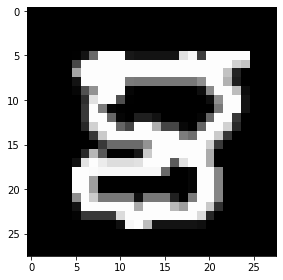

In [ ]:
io.imshow(img_scaled)

### Let's take a look to our neural networks "empirical" performance now

In [ ]:
print("The predicted number by SGD trained model is: " + str(model1.predict_classes(img_scaled.reshape((1, 28, 28, 1)))[0]))

The predicted number by SGD trained model is: 2


In [ ]:
print("The predicted number by Adadelta trained model is: " + str(model2.predict_classes(img_scaled.reshape((1, 28, 28, 1)))[0]))

The predicted number by Adadelta trained model is: 8


In [ ]:
print("The predicted number by Adadelta trained CNN model is: " + str(model3.predict_classes(img_scaled.reshape((1, 28, 28, 1)))[0]))

The predicted number by Adadelta trained CNN model is: 8
